In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
from TestProblems import prey_predator_model, van_der_pol_model, CSTR_3state_model, CSTR_1state_model, PFR_1state_model, PFR_3state_model

# Test simulations for the test problems

## Prey-predator model

In [2]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = [20, 9]  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

N = 1000

f, J = prey_predator_model(a, b)

# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

# Solve using ode15s (method='LSODA')
solution_ode15s = solve_ivp(f, t_span, x0, method='Radau', t_eval=np.linspace(t_span[0], t_span[1], N))

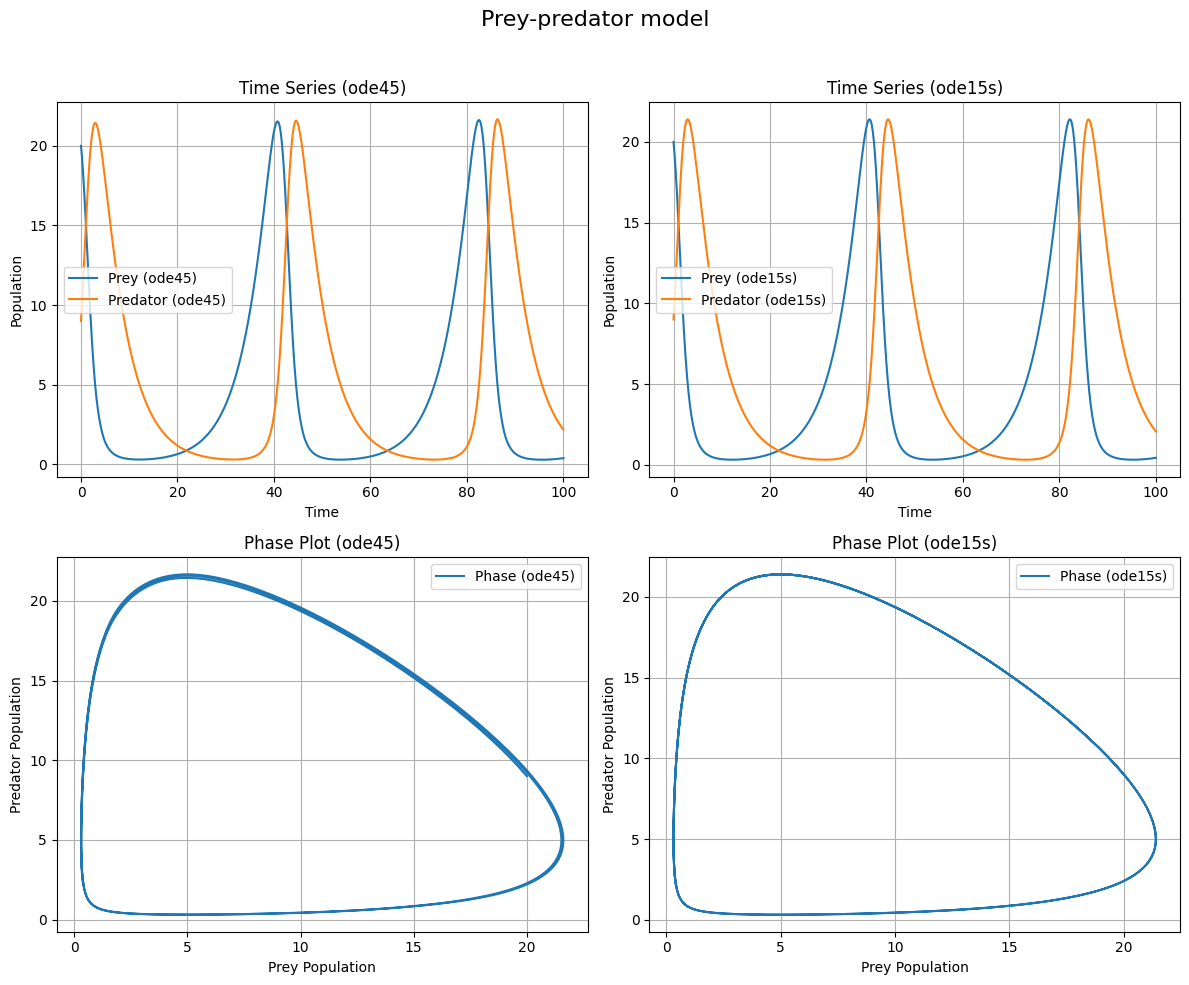

In [3]:
plt.figure(figsize=(12, 10))
plt.suptitle('Prey-predator model', fontsize=16)

# Time series for ode45
plt.subplot(2, 2, 1)
plt.plot(solution_ode45.t, solution_ode45.y[0], label='Prey (ode45)')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='Predator (ode45)')
plt.title('Time Series (ode45)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Time series for ode15s
plt.subplot(2, 2, 2)
plt.plot(solution_ode15s.t, solution_ode15s.y[0], label='Prey (ode15s)')
plt.plot(solution_ode15s.t, solution_ode15s.y[1], label='Predator (ode15s)')
plt.title('Time Series (ode15s)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Phase plot for ode45
plt.subplot(2, 2, 3)
plt.plot(solution_ode45.y[0], solution_ode45.y[1], label='Phase (ode45)')
plt.title('Phase Plot (ode45)')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.legend()
plt.grid(True)

# Phase plot for ode15s
plt.subplot(2, 2, 4)
plt.plot(solution_ode15s.y[0], solution_ode15s.y[1], label='Phase (ode15s)')
plt.title('Phase Plot (ode15s)')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.legend()
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Van der Pol model

In [4]:
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 100  # Stiff
t_span = (0, 20)
x0 = [2, 0]  # Initial condition

N = 1000

f_stiff, _ = van_der_pol_model(mu_stiff)
f_nonstiff, _ = van_der_pol_model(mu_nonstiff)

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

sol_stiff = solve_ivp(f_stiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

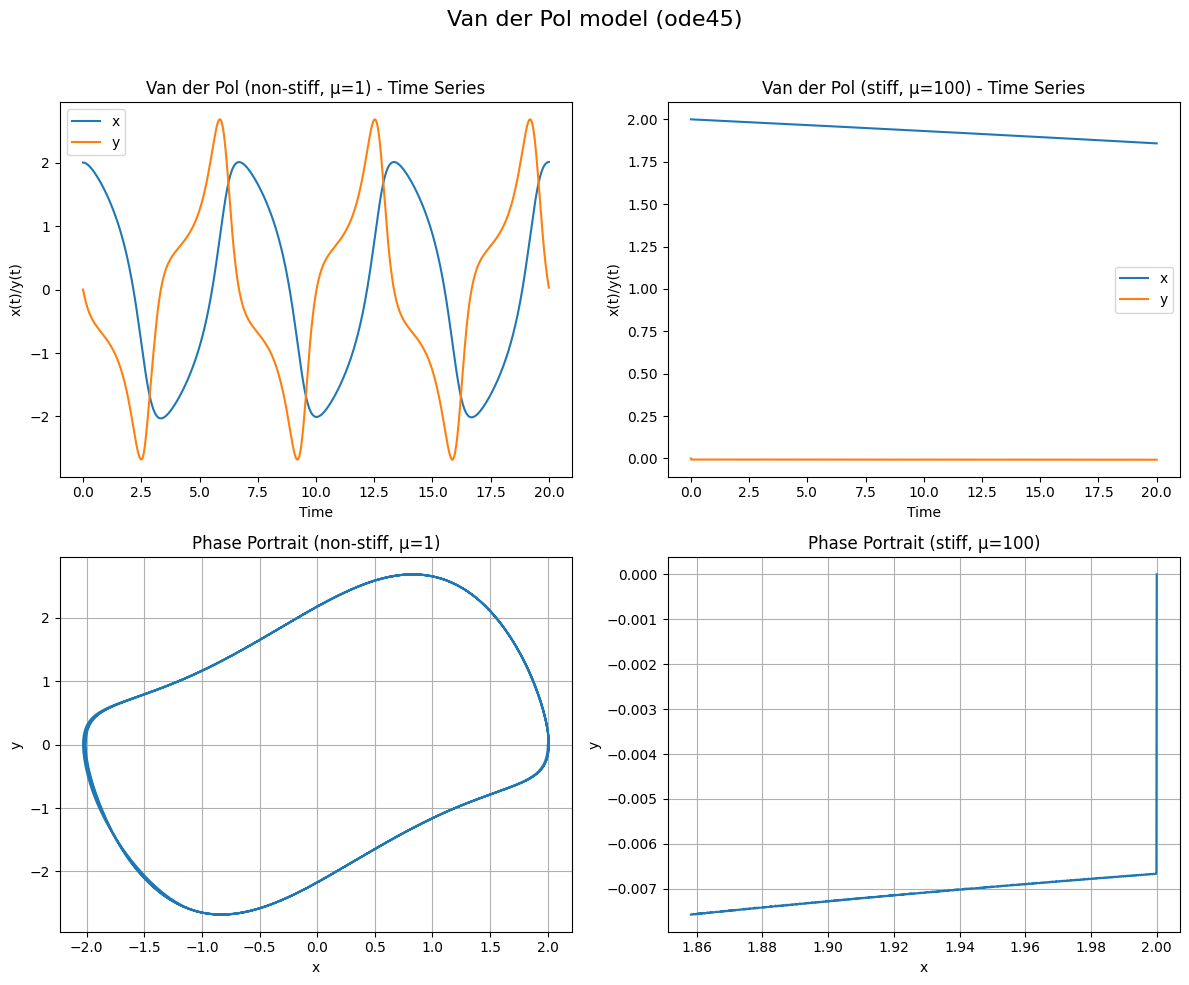

In [ ]:
# Plotting time series and phase portraits
plt.figure(figsize=(12, 10))
plt.suptitle('Van der Pol model (ode45)', fontsize=16)

# Plot time series for non-stiff
plt.subplot(2, 2, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='y')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)/y(t)')

# Plot time series for stiff
plt.subplot(2, 2, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label='x')
plt.plot(sol_stiff.t, sol_stiff.y[1], label='y')
plt.legend()
plt.title('Van der Pol (stiff, μ=100) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)/y(t)')

# Phase portrait for non-stiff
plt.subplot(2, 2, 3)
plt.plot(sol_nonstiff.y[0], sol_nonstiff.y[1], label='Phase (non-stiff, μ=1)')
plt.title('Phase Portrait (non-stiff, μ=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Phase portrait for stiff
plt.subplot(2, 2, 4)
plt.plot(sol_stiff.y[0], sol_stiff.y[1], label='Phase (stiff, μ=100)')
plt.title('Phase Portrait (stiff, μ=100)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [6]:
f_stiff, J_stiff = van_der_pol_model(mu_stiff)
f_nonstiff, J_nonstiff = van_der_pol_model(mu_nonstiff)

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='Radau', t_eval=np.linspace(t_span[0], t_span[1], 1000),jac = J_nonstiff)

sol_stiff = solve_ivp(f_stiff, t_span, x0, method='Radau', t_eval=np.linspace(t_span[0], t_span[1], 1000), jac = J_stiff)

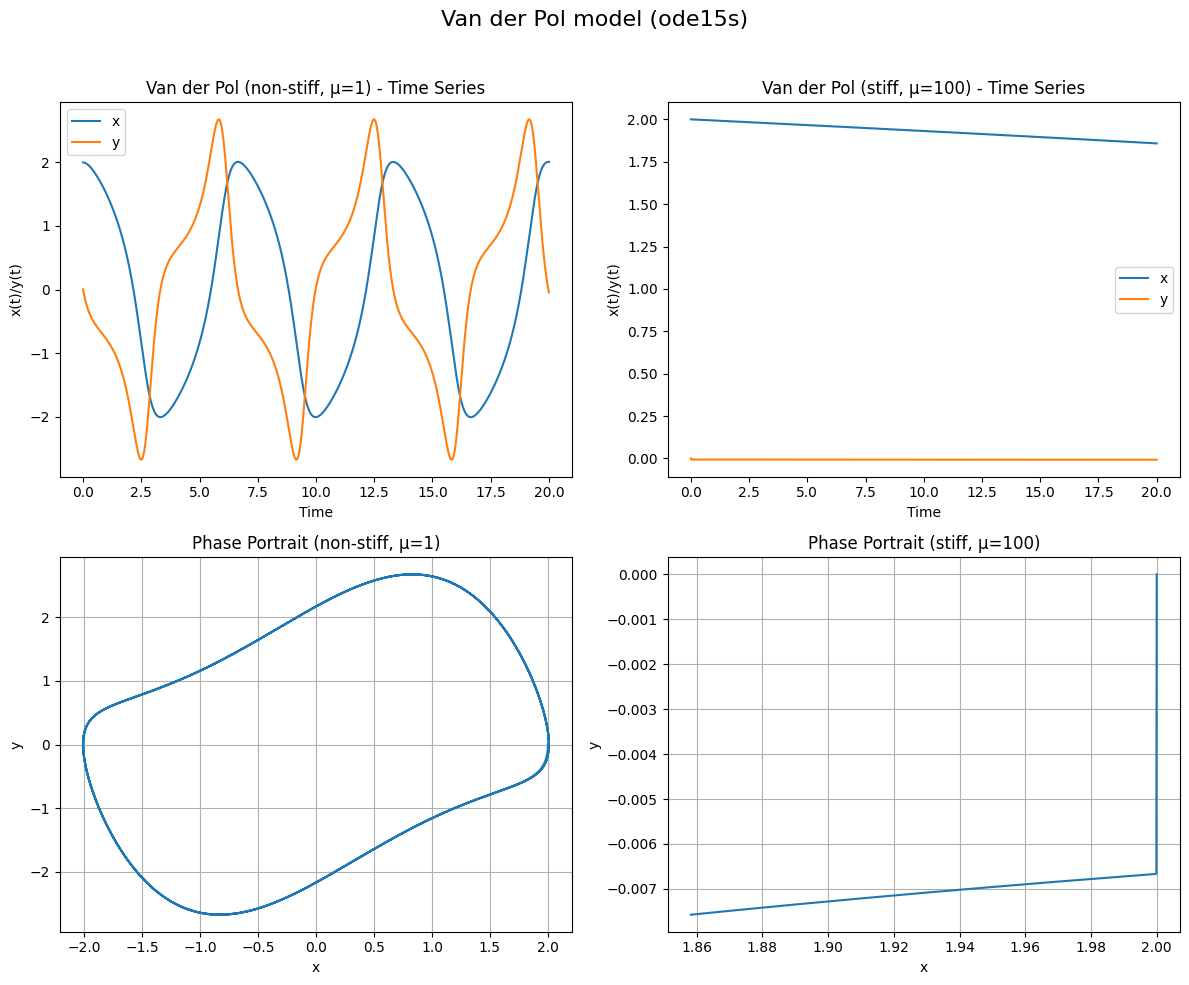

In [7]:
# Plotting time series and phase portraits
plt.figure(figsize=(12, 10))
plt.suptitle('Van der Pol model (ode15s)', fontsize=16)

# Plot time series for non-stiff
plt.subplot(2, 2, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='y')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)/y(t)')

# Plot time series for stiff
plt.subplot(2, 2, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label='x')
plt.plot(sol_stiff.t, sol_stiff.y[1], label='y')
plt.legend()
plt.title('Van der Pol (stiff, μ=100) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)/y(t)')

# Phase portrait for non-stiff
plt.subplot(2, 2, 3)
plt.plot(sol_nonstiff.y[0], sol_nonstiff.y[1], label='Phase (non-stiff, μ=1)')
plt.title('Phase Portrait (non-stiff, μ=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Phase portrait for stiff
plt.subplot(2, 2, 4)
plt.plot(sol_stiff.y[0], sol_stiff.y[1], label='Phase (stiff, μ=100)')
plt.title('Phase Portrait (stiff, μ=100)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Comparison of implicit and explicit solver

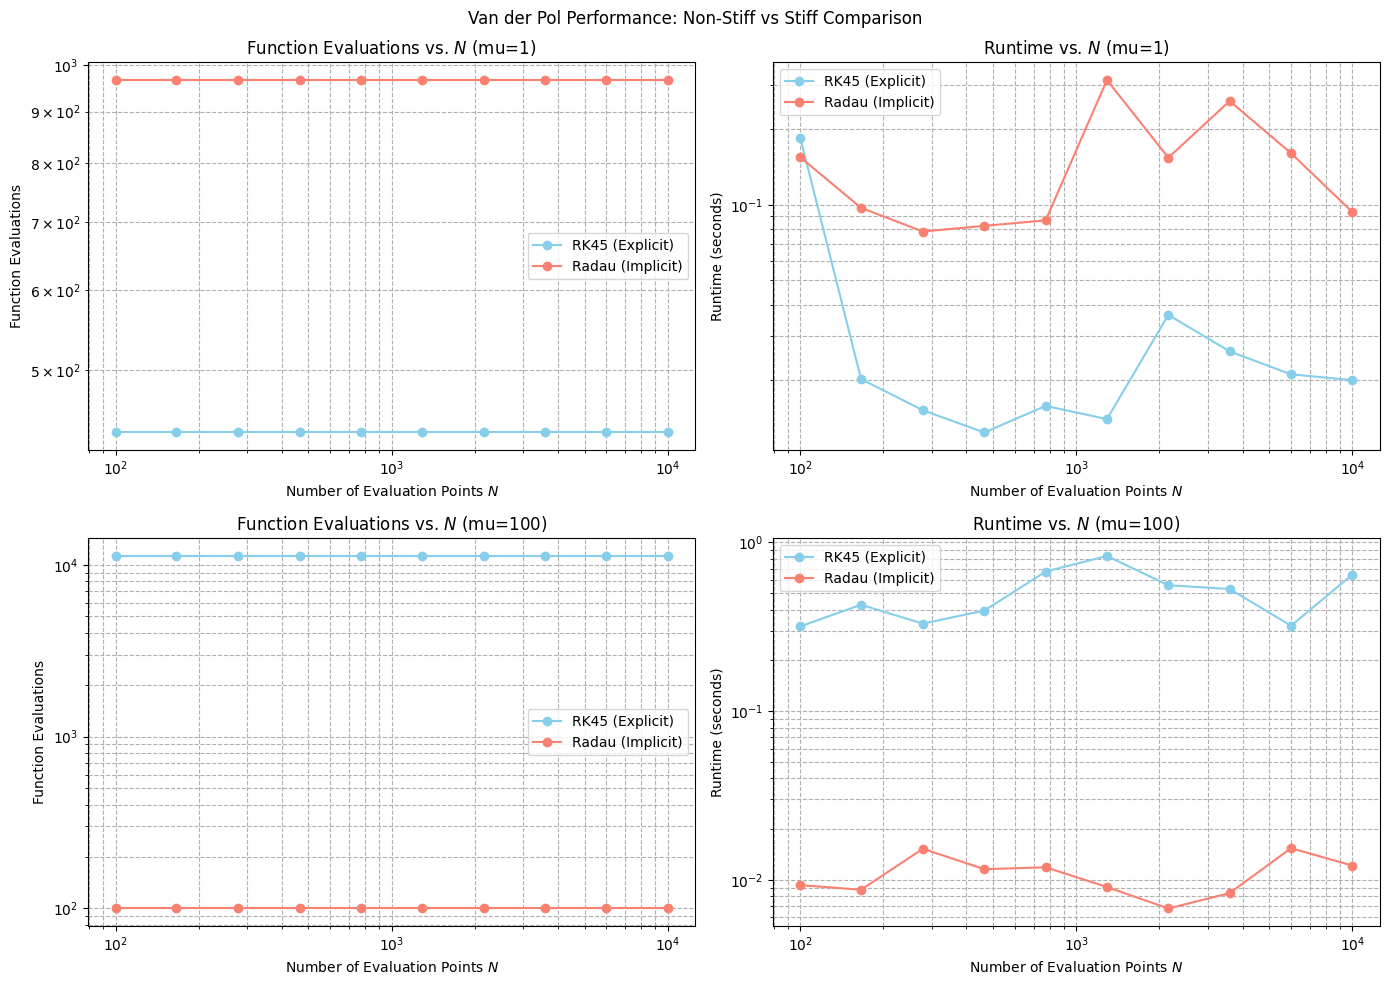

In [8]:
 import time

# Parameters
t_span = (0, 20)
x0 = [2, 0]

# Function to solve and record performance
def solve_and_record(method, mu, N):
    t_eval = np.linspace(t_span[0], t_span[1], N)
    f, Jac = van_der_pol_model(mu)
    start_time = time.time()
    sol = solve_ivp(f, t_span, x0, method=method, t_eval=t_eval)
    end_time = time.time()
    runtime = end_time - start_time
    nfev = sol.nfev
    return runtime, nfev

# Range of N values to test
N_values = np.logspace(2, 4, 10, dtype=int)  # From 1e2 to 1e4 points

# Mu values to test
mu_values = [1, 100]

# Data storage
results = {}

for mu in mu_values:
    times_rk45 = []
    nfev_rk45 = []
    times_radau = []
    nfev_radau = []
    
    for N in N_values:
        time_rk, nfev_rk = solve_and_record('RK45', mu, N)
        time_rad, nfev_rad = solve_and_record('Radau', mu, N)
        
        times_rk45.append(time_rk)
        nfev_rk45.append(nfev_rk)
        times_radau.append(time_rad)
        nfev_radau.append(nfev_rad)
    
    results[mu] = {
        'times_rk45': times_rk45,
        'nfev_rk45': nfev_rk45,
        'times_radau': times_radau,
        'nfev_radau': nfev_radau,
    }

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for idx, mu in enumerate(mu_values):
    axs[idx, 0].plot(N_values, results[mu]['nfev_rk45'], 'o-', label='RK45 (Explicit)', color='skyblue')
    axs[idx, 0].plot(N_values, results[mu]['nfev_radau'], 'o-', label='Radau (Implicit)', color='salmon')
    axs[idx, 0].set_xscale('log')
    axs[idx, 0].set_yscale('log')
    axs[idx, 0].set_xlabel('Number of Evaluation Points $N$')
    axs[idx, 0].set_ylabel('Function Evaluations')
    axs[idx, 0].set_title(f'Function Evaluations vs. $N$ (mu={mu})')
    axs[idx, 0].legend()
    axs[idx, 0].grid(True, which="both", ls="--")

    axs[idx, 1].plot(N_values, results[mu]['times_rk45'], 'o-', label='RK45 (Explicit)', color='skyblue')
    axs[idx, 1].plot(N_values, results[mu]['times_radau'], 'o-', label='Radau (Implicit)', color='salmon')
    axs[idx, 1].set_xscale('log')
    axs[idx, 1].set_yscale('log')
    axs[idx, 1].set_xlabel('Number of Evaluation Points $N$')
    axs[idx, 1].set_ylabel('Runtime (seconds)')
    axs[idx, 1].set_title(f'Runtime vs. $N$ (mu={mu})')
    axs[idx, 1].legend()
    axs[idx, 1].grid(True, which="both", ls="--")

plt.suptitle("Van der Pol Performance: Non-Stiff vs Stiff Comparison")
plt.tight_layout()
plt.show()

## CSTR (3 state model)

In [ ]:
#Parameters
t_span = (0, 120)

min = 60
# Flow rates in L/min
F = [0.7/min,0.6/min,0.5/min,0.4/min,0.3/min,0.2/min,0.3/min,0.4/min,0.5/min,0.6/min,0.7/min,0.7/min,0.2/min,0.2/min,0.7/min,0.7/min]

#F = np.arange(0.1, 0.7, 0.1)/min

t = np.array([])
Tf = np.array([])
Af = np.array([])
Bf = np.array([])

# Initial conditions
Tin = 273.65
CA_in = 1.6/2
CB_in = 2.4/2

x0 = [CA_in, CB_in, Tin]

N = 30

# Storage for results
steady_states = np.array([[], [], []])
flow_rates = np.array([])   

for idx, _ in enumerate(F):
    params = [F[idx],0.105,CA_in,CB_in,Tin]

    f, J = CSTR_3state_model(params)
    # Solve using odeint
    sol = solve_ivp(f, t_span, x0, method='BDF', t_eval=np.linspace(t_span[0], t_span[1], N), Jac=J)

    # The steady state is the final point in the simulation
    CA_ss, CB_ss, T_ss = sol.y[:,-1]

    x0 = np.array([CA_ss, CB_ss, T_ss])
    Af = np.concatenate([Af, sol.y[0]])
    Bf = np.concatenate([Bf, sol.y[1]])
    Tf = np.concatenate([Tf, sol.y[2]-Tin])

    # Store results
    steady_states = np.hstack([steady_states, x0[:,None]])
    flow_rates = np.append(flow_rates, F[idx] * min)  # Convert back to L/min for plotting

    t = np.concatenate([t, (sol.t+(idx)*t_span[1])/min])
    
    
steady_states = steady_states[:, :]
flow_rates = flow_rates[:]



/Users/euan/anaconda3/lib/python3.10/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `Jac`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


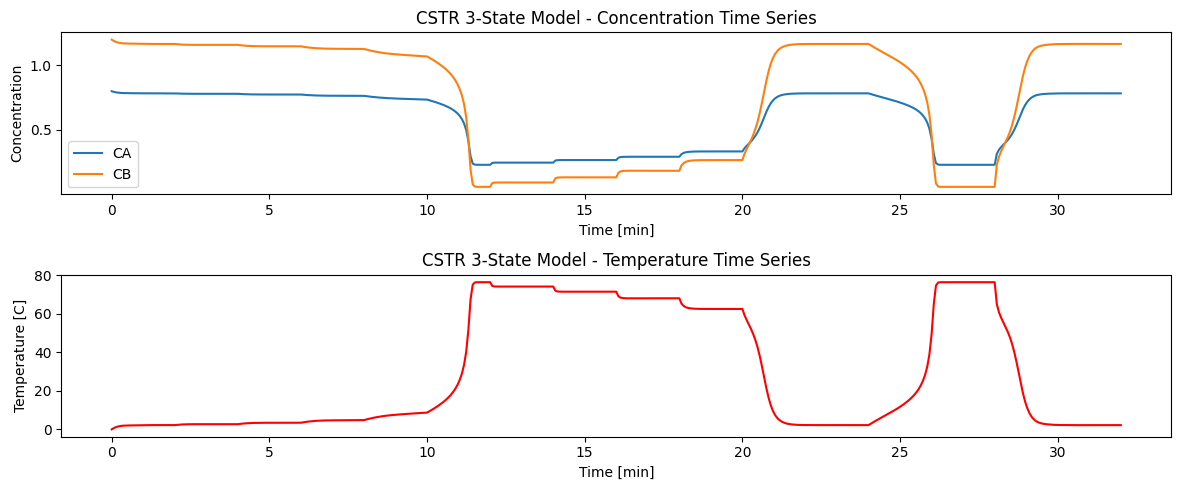

In [33]:
#Plot
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(t, Af, label='CA')
plt.plot(t, Bf, label='CB')
#plt.plot(t, Tf, label='CSTR State 3')
plt.title('CSTR 3-State Model - Concentration Time Series')
plt.xlabel('Time [min]')
plt.ylabel('Concentration')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, Tf, label='Temperature', color = 'red')
plt.title('CSTR 3-State Model - Temperature Time Series')
plt.xlabel('Time [min]') 
plt.ylabel('Temperature [C]')
plt.tight_layout()
plt.show()

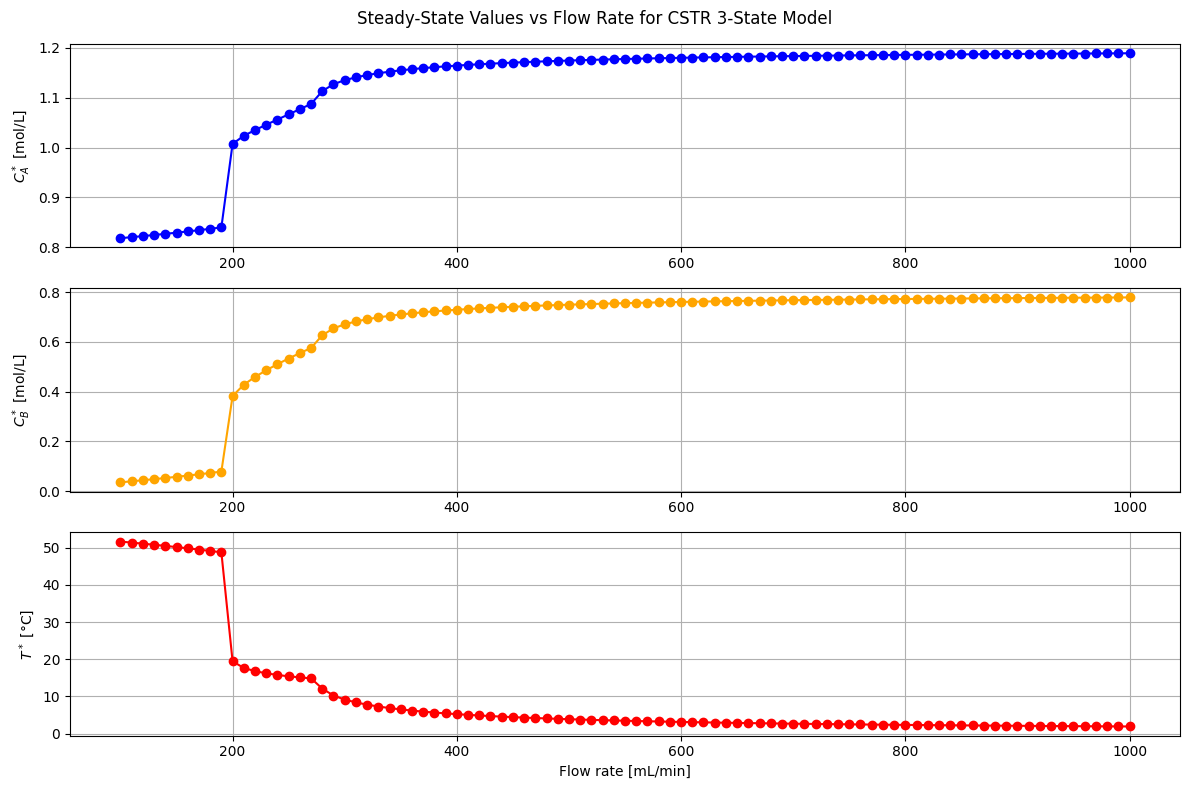

In [2]:
from scipy.optimize import root

def compute_steady_states_CSTR_3state(flow_rates_mLmin, params_template, Tin):
    CA_ss_list = []
    CB_ss_list = []
    T_ss_list = []

    for flow_mLmin in flow_rates_mLmin:
        flow = flow_mLmin / (60 * 1000)  # Convert to L/s
        params = [flow, 0.105, params_template[2], params_template[3], Tin]
        f, _ = CSTR_3state_model(params)

        # Initial guess near inlet values
        x0 = np.array([params_template[2], params_template[3], Tin])

        # Define residual function for steady state: f(x) = 0
        def residual(x):
            return f(0, x)

        sol = root(residual, x0, method='lm')
        if sol.success:
            CA_ss, CB_ss, T_ss = sol.x
            CA_ss_list.append(CA_ss)
            CB_ss_list.append(CB_ss)
            T_ss_list.append(T_ss)
        else:
            print(f"Root finding failed at F = {flow_mLmin} mL/min")
            CA_ss_list.append(np.nan)
            CB_ss_list.append(np.nan)
            T_ss_list.append(np.nan)

    return np.array(CA_ss_list), np.array(CB_ss_list), np.array(T_ss_list)

# Parameters
Tin = 273.65
CA_in = 2.4 / 2
CB_in = 1.6 / 2
params_template = [None, 0.105, CA_in, CB_in, Tin]

flow_rates_mLmin = np.arange(100, 1001, 10)

# Compute steady states
CA_ss, CB_ss, T_ss = compute_steady_states_CSTR_3state(flow_rates_mLmin, params_template, Tin)

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(flow_rates_mLmin, CA_ss, 'o-',color='blue')
plt.ylabel('$C_A^*$ [mol/L]')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(flow_rates_mLmin, CB_ss, 'o-', color='orange')
plt.ylabel('$C_B^*$ [mol/L]')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(flow_rates_mLmin, T_ss - 273.15, 'o-', color = 'red')  # Convert to Celsius
plt.xlabel('Flow rate [mL/min]')
plt.ylabel('$T^*$ [°C]')
plt.grid(True)

plt.suptitle('Steady-State Values vs Flow Rate for CSTR 3-State Model')
plt.tight_layout()
plt.show()

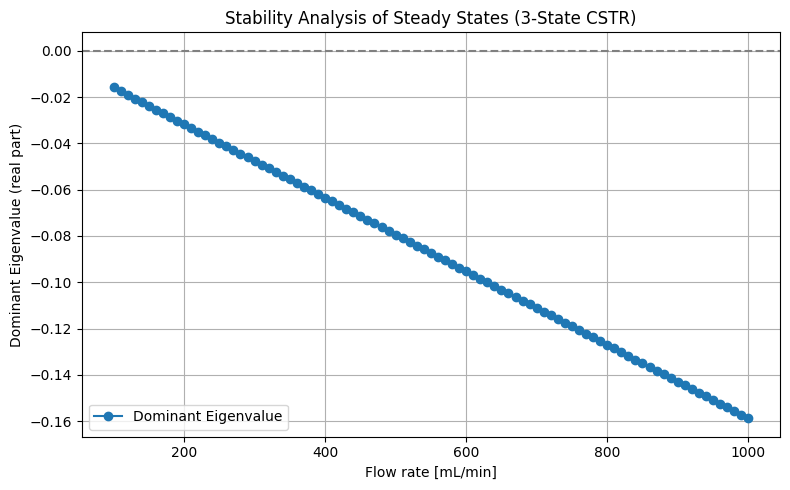

In [44]:
def compute_eigenvalues_CSTR_3state(flow_rates_mLmin, CA_ss, CB_ss, T_ss, params_template, Tin):
    dominant_eigenvalues = []

    for i, flow_mLmin in enumerate(flow_rates_mLmin):
        flow = flow_mLmin / (60 * 1000)  # Convert to L/s
        T = T_ss[i]
        CA = CA_ss[i]
        CB = CB_ss[i]

        if np.isnan(T) or np.isnan(CA) or np.isnan(CB):
            dominant_eigenvalues.append(np.nan)
            continue

        params = [flow, 0.105, params_template[2], params_template[3], Tin]
        _, J_func = CSTR_3state_model(params)
        J = J_func(0, [CA, CB, T])
        eigs = np.linalg.eigvals(J)

        dominant_eigenvalues.append(np.max(np.real(eigs)))  # Real part of dominant eigenvalue

    return np.array(dominant_eigenvalues)

# Compute eigenvalues
eigenvalues = compute_eigenvalues_CSTR_3state(flow_rates_mLmin, CA_ss, CB_ss, T_ss, params_template, Tin)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(flow_rates_mLmin, eigenvalues, 'o-', label='Dominant Eigenvalue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Flow rate [mL/min]')
plt.ylabel('Dominant Eigenvalue (real part)')
plt.title('Stability Analysis of Steady States (3-State CSTR)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## CSTR (1 state model)

In [38]:
#Parameters
t_span = (0, 120)

min = 60
F = [0.7/min,0.6/min,0.5/min,0.4/min,0.3/min,0.2/min,0.3/min,0.4/min,0.5/min,0.6/min,0.7/min,0.7/min,0.2/min,0.2/min,0.7/min,0.7/min]

#F = np.arange(0.1, 0.7, 0.1)/min

t = np.array([])
Tf = np.array([])

Tin = 273.65
CB_in = 2.4/2
CA_in = 1.6/2

x0 = [Tin]

N = 60

# Storage for results
steady_states = np.array([])
flow_rates = np.array([])

for idx, flow in enumerate(F):
    params = [flow,0.105,CA_in,CB_in,Tin]

    f, J = CSTR_1state_model(params)
    # Solve using odeint
    sol = solve_ivp(f, t_span, x0, method='BDF', t_eval=np.linspace(t_span[0], t_span[1], N), rtol=1e-5, atol=1e-5, jac=J)
    # The steady state is the final point in the simulation
    T_ss = sol.y[0][-1]
    
    x0 = np.array([T_ss])

    Tf = np.concatenate([Tf, sol.y[0]-Tin])

    # Store results
    steady_states = np.hstack([steady_states, x0])
    flow_rates = np.append(flow_rates, F[idx] * min * 1000)  # Convert back to L/min for plotting

    t = np.concatenate([t, (sol.t+(idx)*t_span[1])/min])
    




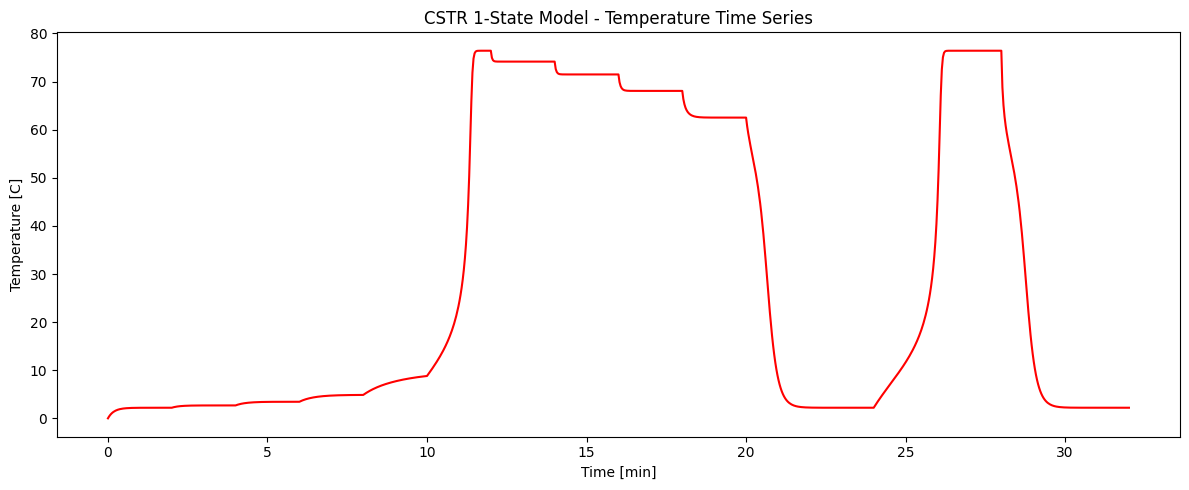

In [39]:
#Plot
plt.figure(figsize=(12, 5))
plt.plot(t, Tf, label='Temperature', color = 'red')
plt.title('CSTR 1-State Model - Temperature Time Series')
plt.xlabel('Time [min]') 
plt.ylabel('Temperature [C]')
plt.tight_layout()
plt.show()

Finding the steady state as a function of flow rate by solving RHS of model

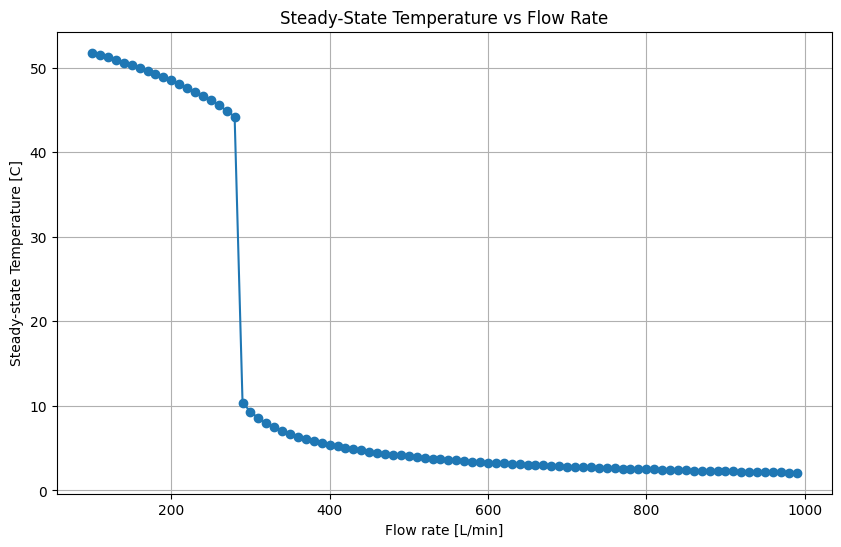

In [ ]:
from scipy.optimize import root_scalar

def compute_steady_state_temperature(flow_rates, params_template, Tin, beta):
    steady_states = []
    for flow in flow_rates:
        # Update parameters for current flow rate
        params = [flow, 0.105, params_template[2], params_template[3], Tin]  # F, V, CA_in, CB_in, Tin

        # Get the model
        f_rhs, _ = CSTR_1state_model(params)

        # Define scalar function for root finding (steady-state condition: f(T) = 0)
        def steady_state_func(T):
            return f_rhs(0, T)  # time argument is unused

        # Define safe bracket for temperature search (Tin to reasonable upper bound)
        Tmax = Tin + 100  # adjust upper bound as needed
        try:
            sol = root_scalar(steady_state_func, bracket=[Tin, Tmax], method='brentq')
            T_ss = sol.root
            steady_states.append(T_ss)
        except ValueError:
            print(f"No root found for flow rate {flow*60:.1f} L/min")
            steady_states.append(np.nan)
    
    return np.array(steady_states)

# Given data
Tin = 273.65
CA_in = 2.4 / 2
CB_in = 1.6 / 2
params_template = [None, 0.105, CA_in, CB_in, Tin]

min = 60
F = np.arange(0.1,1,0.01) / min
beta = 560 / (1.0 * 4.186)

# Compute steady states
T_steady = compute_steady_state_temperature(F, params_template, Tin, beta)

# Optionally convert F to L/min for plotting
F_plot = F * min * 1000


plt.figure(figsize=(10, 6))
plt.plot( F_plot, T_steady - 273,'o-')
plt.ylabel('Steady-state Temperature [C]')
plt.xlabel('Flow rate [L/min]')
plt.title('Steady-State Temperature vs Flow Rate')
plt.grid(True)
plt.show()



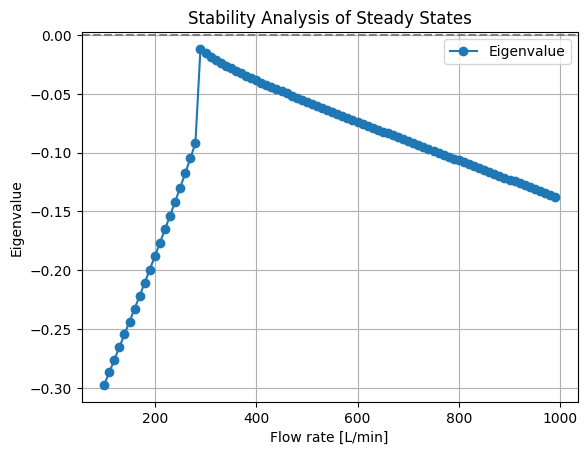

In [ ]:
# Eigenvalues
def compute_eigenvalues(flow_rates, T_steady, params_template, Tin):
    eigenvalues = []
    for i, flow in enumerate(flow_rates):
        T_ss = T_steady[i]
        if np.isnan(T_ss):
            eigenvalues.append(np.nan)
            continue
        params = [flow, 0.105, params_template[2], params_template[3], Tin]
        _, J_func = CSTR_1state_model(params)
        J = J_func(0, T_ss)  # time is not used
        eigenvalues.append(J[0])  # scalar Jacobian
    return np.array(eigenvalues)

eigenvalues = compute_eigenvalues(F, T_steady, params_template, Tin)
plt.plot(F_plot, eigenvalues, 'o-', label='Eigenvalue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Flow rate [mL/min]')
plt.ylabel('Eigenvalue')
plt.title('Stability Analysis of Steady States')
plt.grid(True)
plt.legend()
plt.show()


## PFR 3 state

In [3]:
# Define parameters
params = {
    "dz": 0.1,
    "v": 0.01, # velocity, F/A, F = 400 ml/min A = 0.1 m^2 => v = 400 / 1000 / 1000 / 60 / 0.1 = 
    "D": [0.1, 0.1, 0.1],
    "beta": 560.0 / (1.0 * 4.186),
    "k": lambda T: 1.0 * np.exp(-5000/T),
}
Tin = 273.65
CA_in = 1.6 / 2
CB_in = 2.4 / 2
u = [CA_in, CB_in, Tin]
# Create model functions
f, J = PFR_3state_model(p = params,u = u)

# Initial condition
n = 50  # number of spatial points
x0 = np.concatenate([
    np.ones(n) * CA_in,    # CA initial
    np.ones(n) * CB_in,    # CB initial
    Tin*np.ones(n)  # T initial
])

t_span = (0, 200)
N = 1000



# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='BDF', t_eval=np.linspace(t_span[0], t_span[1], N))
CA = sol.y[:n]
CB = sol.y[n:2*n]
T = sol.y[2*n:]

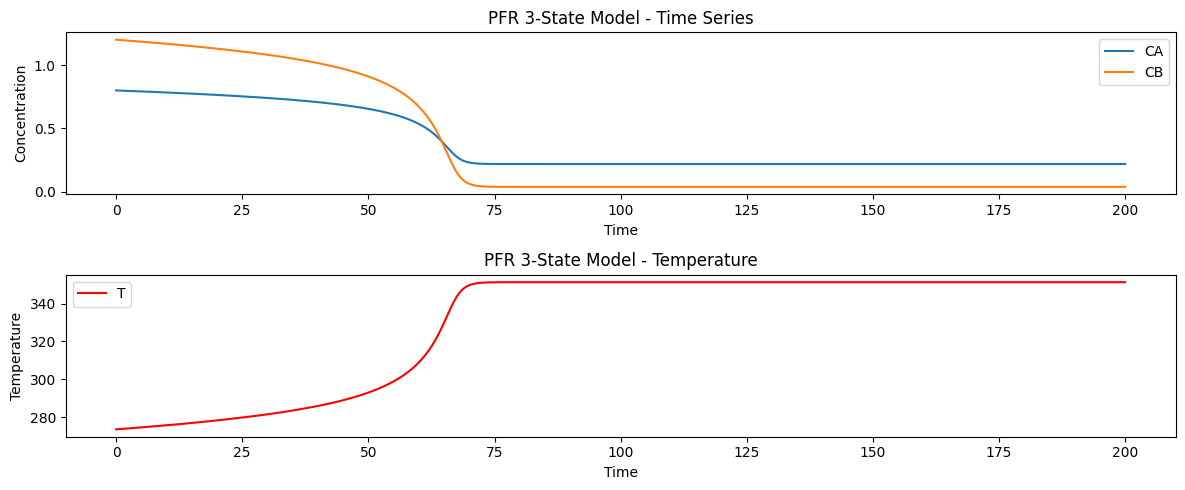

In [22]:


plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(sol.t, CA[0], label='CA')
plt.plot(sol.t, CB[0], label='CB')
plt.title('PFR 3-State Model - Time Series')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(sol.t, T[0], label='T', color = 'red')
plt.title('PFR 3-State Model - Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.tight_layout()
plt.show()



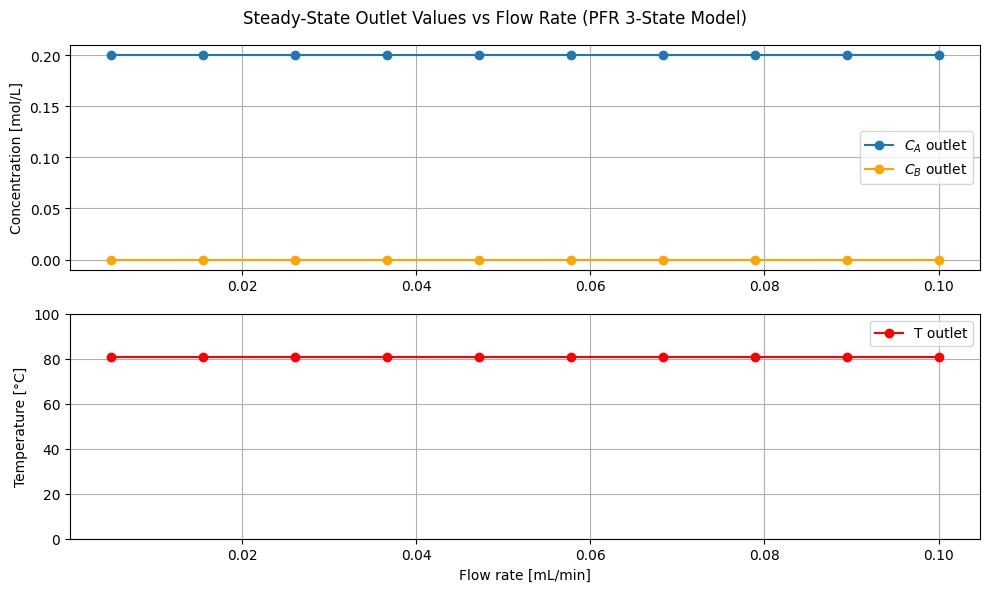

In [26]:

# --- Constants ---
Tin = 273.65
CA_in = 1.6 / 2
CB_in = 2.4 / 2
u = [CA_in, CB_in, Tin]

n = 50  # spatial points
dz = 10 / n
D = [0.1, 0.1, 0.1]
beta = 560.0 / 4.186
k = lambda T: np.exp(24.6) * np.exp(-8500 / T)

flow_rates = np.linspace(0.005, 0.1, 10)  # m/s

# --- Storage ---
T_outlet_vals = []
CA_outlet_vals = []
CB_outlet_vals = []

# --- Loop over flow rates ---
for F_mLmin in flow_rates:
    v = F_mLmin  # Convert mL/min → m/s, A = 0.1 m^2

    params = {
        "dz": dz,
        "v": v,
        "D": D,
        "beta": beta,
        "k": k,
    }

    f, _ = PFR_3state_model(u=u, p=params)

    x0 = np.concatenate([
        np.ones(n) * CA_in,
        np.ones(n) * CB_in,
        np.ones(n) * Tin
    ])

    t_span = (0, 200)
    t_eval = np.linspace(*t_span, 1000)

    sol = solve_ivp(f, t_span, x0, method='BDF', t_eval=t_eval)

    CA = sol.y[:n, -1]
    CB = sol.y[n:2*n, -1]
    T = sol.y[2*n:, -1]

    CA_outlet_vals.append(CA[-1])
    CB_outlet_vals.append(CB[-1])
    T_outlet_vals.append(T[-1])

# --- Plotting ---
plt.figure(figsize=(10, 6))

# CA and CB in one subplot
plt.subplot(2, 1, 1)
plt.plot(flow_rates, CA_outlet_vals, 'o-', label='$C_A$ outlet')
plt.plot(flow_rates, CB_outlet_vals, 'o-', label='$C_B$ outlet', color='orange')
plt.ylabel('Concentration [mol/L]')
plt.legend()
plt.grid(True)

# Temperature in second subplot
plt.subplot(2, 1, 2)
plt.plot(flow_rates, np.array(T_outlet_vals) - 273.15, 'o-', color='red', label='T outlet')
plt.xlabel('Flow rate [mL/min]')
plt.ylabel('Temperature [°C]')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.suptitle('Steady-State Outlet Values vs Flow Rate (PFR 3-State Model)')
plt.tight_layout()
plt.show()


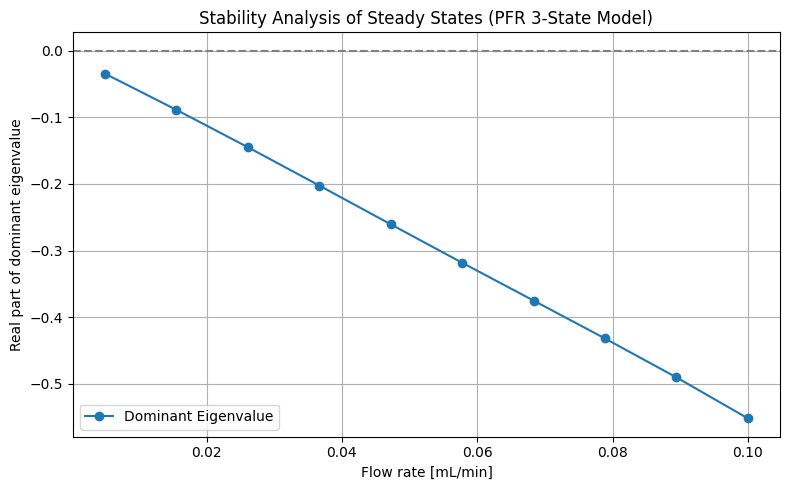

In [28]:
from scipy.linalg import eigvals
from TestProblems import PFR_3state_model
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
dominant_eigenvalues = []
flow_rates = np.linspace(0.005, 0.1, 10)  # m/s

for idx, F_mLmin in enumerate(flow_rates):
    v = F_mLmin
    params = {
        "dz": dz,
        "v": v,
        "D": D,
        "beta": beta,
        "k": k,
    }

    f, J_func = PFR_3state_model(u=u, p=params)

    x0 = np.concatenate([
        np.ones(n) * CA_in,
        np.ones(n) * CB_in,
        np.ones(n) * Tin
    ])

    sol = solve_ivp(f, (0, 200), x0, method='BDF', t_eval=np.linspace(0, 200, 1000))
    x_ss = sol.y[:, -1]

    # Get full Jacobian directly (already 3n x 3n)
    J_full = J_func(0, x_ss)

    eigs = eigvals(J_full)
    lambda_max = np.max(np.real(eigs))
    dominant_eigenvalues.append(lambda_max)


# --- Plotting eigenvalues ---
plt.figure(figsize=(8, 5))
plt.plot(flow_rates, dominant_eigenvalues, 'o-', label='Dominant Eigenvalue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Flow rate [mL/min]')
plt.ylabel('Real part of dominant eigenvalue')
plt.title('Stability Analysis of Steady States (PFR 3-State Model)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## PFR 1 state

/Users/euan/anaconda3/lib/python3.10/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `Jac`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


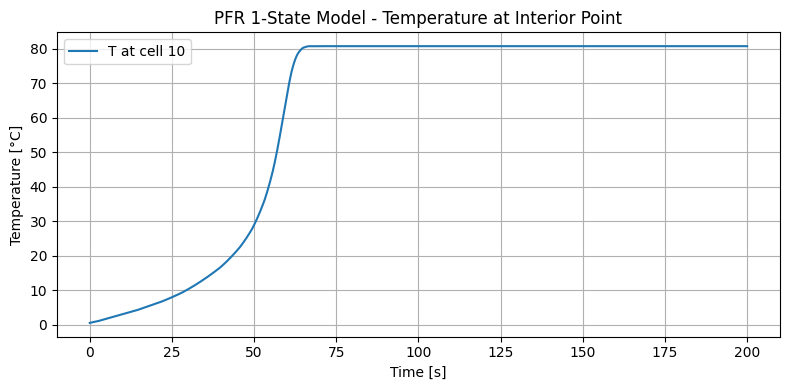

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from TestProblems import PFR_1state_model  # Make sure this matches your file name

# --- Parameters ---
Tin = 273.65
CA_in = 1.6 / 2
CB_in = 2.4 / 2
u = [CA_in, CB_in, Tin]

n = 50  # number of spatial cells
dz = 10 / n
DT = 0.1
beta = 560.0 / 4.186
Ea_R = 8500.0
k = lambda T: np.exp(24.6) * np.exp(-Ea_R / T)
v = 400 / (1000 * 1000 * 60 * 0.1)  # F = 400 mL/min, A = 0.1 m^2

params = {
    "dz": dz,
    "v": v,
    "D": DT,
    "beta": beta,
    "k": k,
}

# --- Create model ---
f, J = PFR_1state_model(u=u, p=params)

# --- Initial condition ---
x0 = np.ones(n) * Tin

# --- Time domain ---
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

# --- Solve system ---
sol = solve_ivp(f, t_span, x0, method='BDF', t_eval=t_eval, Jac = J)

# --- Plotting ---
T = sol.y

plt.figure(figsize=(8, 4))
plt.plot(sol.t, T[10] - 273.15, label='T at cell 10')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [°C]')
plt.title('PFR 1-State Model - Temperature at Interior Point')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0
v = 0.0



v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03
v = 0.03


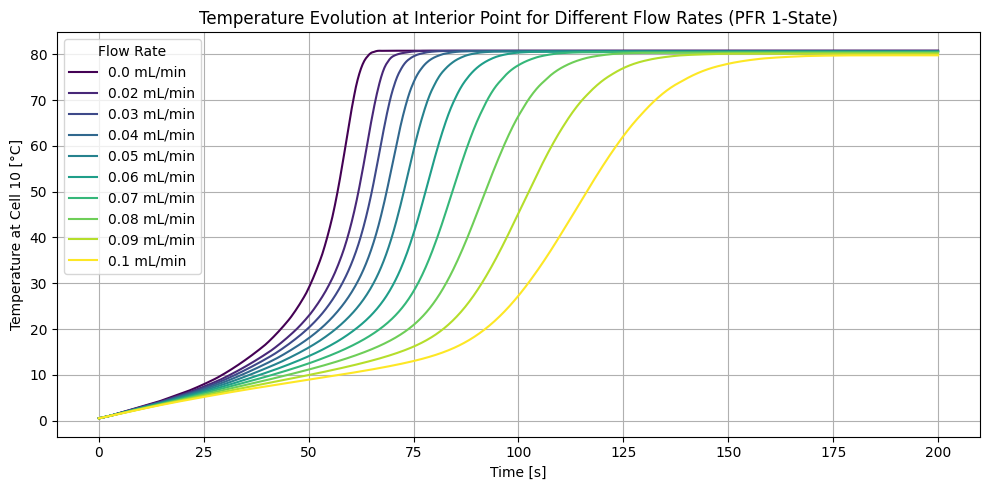

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from TestProblems import PFR_1state_model

# --- Constants ---
Tin = 273.65
CA_in = 1.6 / 2
CB_in = 2.4 / 2
u = [CA_in, CB_in, Tin]

n = 50
dz = 10 / n
DT = 0.1
beta = 560.0 / 4.186
Ea_R = 8500.0
k = lambda T: np.exp(24.6) * np.exp(-Ea_R / T)

# Flow rates in mL/min
flow_rates = np.round(np.linspace(0.005, 0.1, 10),2)  # m/s

colors = plt.cm.viridis(np.linspace(0, 1, len(flow_rates)))
test = np.arange(1,10,1)
# --- Time domain ---
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

# --- Plot setup ---
plt.figure(figsize=(10, 5))

for i, F_mLmin in enumerate(flow_rates):
    v = F_mLmin  # Convert mL/min to m/s

    params = {
        "dz": dz,
        "v": v,
        "D": DT,
        "beta": beta,
        "k": k,
    }

    f, _ = PFR_1state_model(u=u, p=params)

    x0 = np.ones(n) * Tin
    sol = solve_ivp(f, t_span, x0, method='BDF', t_eval=t_eval)

    T_slice = sol.y[10] - 273.15  # Convert to °C
    plt.plot(sol.t, T_slice, label=f'{F_mLmin} mL/min', color=colors[i])

plt.xlabel('Time [s]')
plt.ylabel('Temperature at Cell 10 [°C]')
plt.title('Temperature Evolution at Interior Point for Different Flow Rates (PFR 1-State)')
plt.legend(title='Flow Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


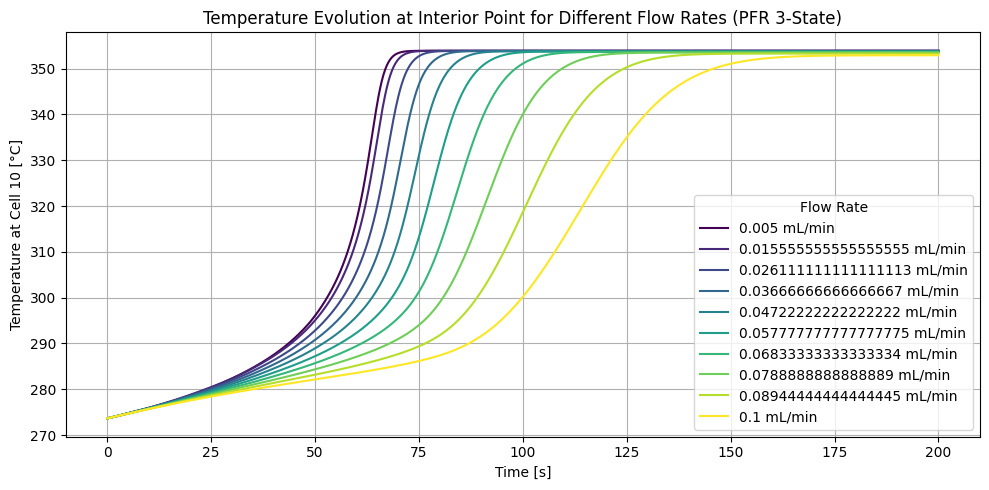

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from TestProblems import PFR_3state_model  # Ensure this is your correct import

# --- Constants ---
Tin = 273.65
CA_in = 1.6 / 2
CB_in = 2.4 / 2
u = [CA_in, CB_in, Tin]

n = 50
dz = 10 / n
D = [0.1, 0.1, 0.1]
beta = 560.0 / 4.186
Ea_R = 8500.0
k = lambda T: np.exp(24.6) * np.exp(-Ea_R / T)

# Flow rates in mL/min
colors = plt.cm.viridis(np.linspace(0, 1, len(flow_rates)))

# --- Time domain ---
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

# --- Plot setup ---
plt.figure(figsize=(10, 5))

for i, F_mLmin in enumerate(flow_rates):
    v = F_mLmin # Convert mL/min to m/s

    params = {
        "dz": dz,
        "v": v,
        "D": D,
        "beta": beta,
        "k": k,
    }

    f, _ = PFR_3state_model(u=u, p=params)

    # Initial state
    x0 = np.concatenate([
        np.ones(n) * CA_in,    # CA
        np.ones(n) * CB_in,    # CB
        np.ones(n) * Tin       # T
    ])

    sol = solve_ivp(f, t_span, x0, method='BDF', t_eval=t_eval)

    # Extract T at cell 10
    T_slice = sol.y[2*n+10]  # Convert to °C
    plt.plot(sol.t, T_slice, label=f'{F_mLmin} mL/min', color=colors[i])

plt.xlabel('Time [s]')
plt.ylabel('Temperature at Cell 10 [°C]')
plt.title('Temperature Evolution at Interior Point for Different Flow Rates (PFR 3-State)')
plt.legend(title='Flow Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005


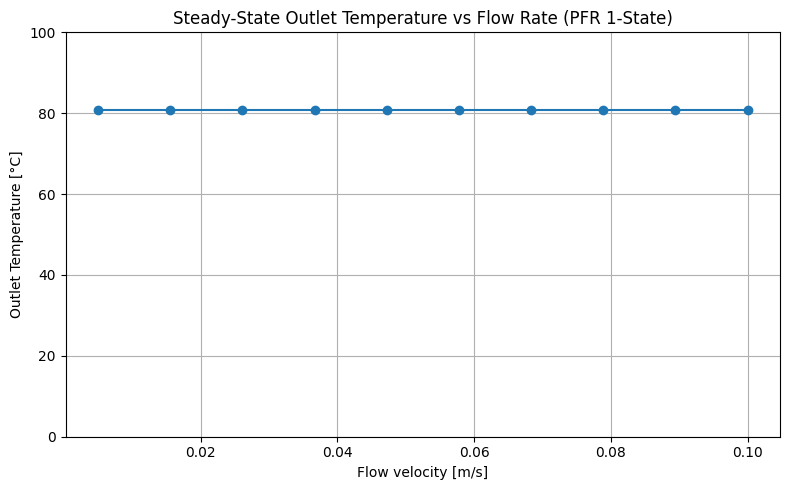

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from TestProblems import PFR_1state_model

# --- Constants ---
Tin = 273.65
CA_in = 1.6 / 2
CB_in = 2.4 / 2
u = [CA_in, CB_in, Tin]

n = 50
dz = 10 / n
DT = 0.1
beta = 560.0 / 4.186
Ea_R = 8500.0
k = lambda T: np.exp(24.6) * np.exp(-Ea_R / T)

# --- Flow rates (velocities in m/s) ---
flow_rates = np.linspace(0.005, 0.1, 10)

# --- Storage for outlet temperatures ---
T_outlet_vals = []

# --- Time domain ---
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

for v in flow_rates:
    params = {
        "dz": dz,
        "v": v,
        "D": DT,
        "beta": beta,
        "k": k,
    }

    f, _ = PFR_1state_model(u=u, p=params)

    x0 = np.ones(n) * Tin
    sol = solve_ivp(f, t_span, x0, method='BDF', t_eval=t_eval)

    T_outlet = sol.y[-1, -1]  # Last cell, last time point
    T_outlet_vals.append(T_outlet)

# --- Plotting ---
plt.figure(figsize=(8, 5))
plt.plot(flow_rates, np.array(T_outlet_vals) - 273.15, 'o-')
plt.xlabel('Flow velocity [m/s]')
plt.ylabel('Outlet Temperature [°C]')
plt.title('Steady-State Outlet Temperature vs Flow Rate (PFR 1-State)')
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()


v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005
v = 0.005


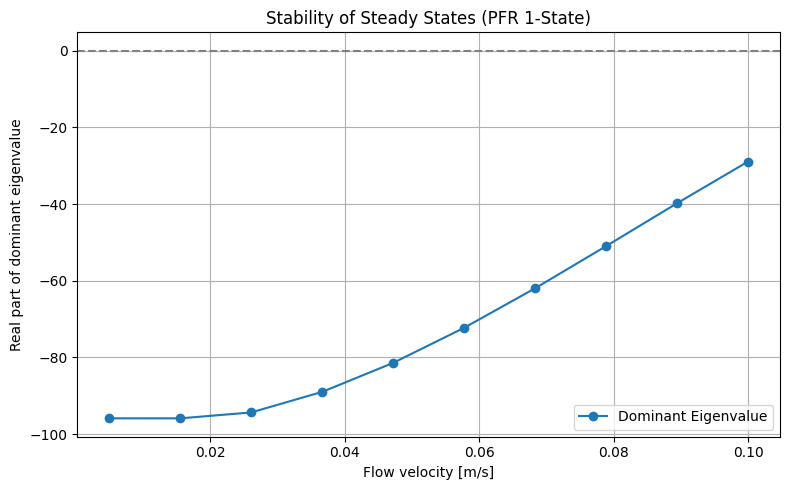

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import eigvals
from TestProblems import PFR_1state_model

# --- Constants ---
Tin = 273.65
CA_in = 1.6 / 2
CB_in = 2.4 / 2
u = [CA_in, CB_in, Tin]

n = 50
dz = 10 / n
DT = 0.1
beta = 560.0 / 4.186
Ea_R = 8500.0
k = lambda T: np.exp(24.6) * np.exp(-Ea_R / T)

# --- Flow rates (velocities) ---
flow_rates = np.linspace(0.005, 0.1, 10)
dominant_eigenvalues = []

# --- Time domain ---
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

for v in flow_rates:
    params = {
        "dz": dz,
        "v": v,
        "D": DT,
        "beta": beta,
        "k": k,
    }

    f, J_func = PFR_1state_model(u=u, p=params)

    x0 = np.ones(n) * Tin
    sol = solve_ivp(f, t_span, x0, method='BDF', t_eval=t_eval)

    x_ss = sol.y[:, -1]

    # Compute full Jacobian
    J = J_func(0, x_ss)

    # Compute dominant eigenvalue (largest real part)
    eigs = eigvals(J)
    lambda_max = np.max(np.real(eigs))
    dominant_eigenvalues.append(lambda_max)

# --- Plotting ---
plt.figure(figsize=(8, 5))
plt.plot(flow_rates, dominant_eigenvalues, 'o-', label='Dominant Eigenvalue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Flow velocity [m/s]')
plt.ylabel('Real part of dominant eigenvalue')
plt.title('Stability of Steady States (PFR 1-State)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
